# K-Means Clustering

## Import library

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sn
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
from pylab import rcParams

In [24]:
%matplotlib inline
rcParams['figure.figsize']=7,4


## Dataset

In [25]:
iris=datasets.load_iris() #memanggil datasets
X=scale(iris.data) 
y=pd.DataFrame(iris.target) #membuat kolom baru
variable_names=iris.feature_names
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## Running Model

In [26]:
#pengelompokan dengan K-Means Clustering dengan n sebesar 3 (sesuai dengan data asli)
clustering=KMeans(n_clusters=3,random_state=5) 
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

## Accuracy Model

#### Graphics

In [27]:
iris_df=pd.DataFrame(iris.data)
iris_df.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.columns=['Targets']

Text(0.5, 1.0, 'K-Means Calsssification')

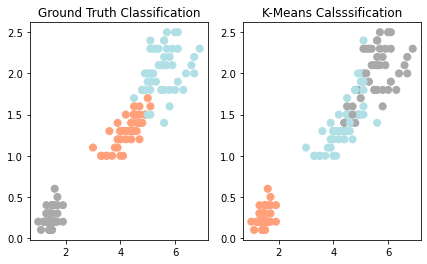

In [34]:
#membuat grafik berdasarkan kelompok dari K-Means Clustering dan data asli
color_theme=np.array(['darkgray','lightsalmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Calsssification')

Text(0.5, 1.0, 'K-Means Calsssification')

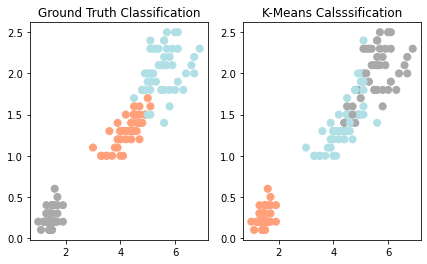

In [35]:
relabel=np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Calsssification')

#### Number of Accuracy

In [37]:
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



#### tingkat akurasi dari pengelompokan menggunakan K-Means Clustering adalah 83%. Artinya, 83% hasil pengelompokan dari metode K-Means Clustering sama dengan pengelompokan yang sudah ada sebelumnya.